In [74]:
import pandas as pd
import jieba
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [49]:
# 读取文件
with open('/Users/shiwei/Desktop/《神印王座》.txt', 'r', encoding='utf-8') as f:
    text = [line.strip('\n') for line in f.readlines()]

In [50]:
text

['    《神印王座》来自: http://www.xdizhu.net/txt/2592.html',
 '',
 '===六大圣殿之骑士圣殿===',
 '',
 '在正式上传之前，我每天为大家介绍一座圣殿，即是预热，也让大家对设定多了解一些。同时，在这里感谢大家的慷慨打赏，尤其是芙蓉、小狼和枫秀三位，由衷感谢。',
 '',
 '    骑士圣殿，圣殿联盟六大圣殿之首。主要分为守护骑士和惩戒骑士两大类。',
 '',
 '    守护骑士擅长于各种辅助、治疗，擅长防御，在团队中能起到中流砥柱的作用。',
 '',
 '    惩戒骑士则擅长于个体战斗，个人战斗力极强。',
 '',
 '    骑士称号，由低到高：',
 '',
 '    骑士侍从，准骑士，骑士拥有坐骑，大骑士，大地骑士天空骑士，辉耀骑士，圣殿骑士，圣骑士，神印骑士',
 '',
 '    问号并不是错误，而是一些暂时还不能为大家揭示的秘密。',
 '',
 '    我们的主角就是一位骑士哦。',
 '',
 '    下面对应说一下等级相对应的灵力数量，以后其他职业也同骑士职业。',
 '',
 '    一阶职业侍从骑士共十级，第十级进阶对应灵力：',
 '',
 '    10、20、30、40、50、60、70、80、90、100',
 '',
 '    二阶职业准骑士对应灵力：',
 '',
 '    101－110、120、130、140、150、160、170、180、190、200',
 '',
 '    三阶职业骑士对应灵力：',
 '',
 '    201－210、240、270、300、330、360、390、420、450、500',
 '',
 '    四阶职业大骑士对应灵力：',
 '',
 '    501－550、700、850、1000、1150、1300、1450、1600、1750、2000',
 '',
 '    五阶职业大地骑士对应灵力：',
 '',
 '    2001－2100、2300、2500、2700、2900、3100、3300、3500、3700、4000',
 '',
 '    六阶职业辉耀骑士对应灵力：',
 '',
 '    4001－4200、4800、5400、6000、6600、7200、7800、8

limit_output extension: Maximum message size of 10000 exceeded with 34305 characters

In [51]:
# 清洗数据，只保留汉字
text = [re.sub(r'[^\u4e00-\u9fa5]', '', line) for line in text]

In [61]:
with open('/Users/shiwei/Desktop/stopwords_full.txt', 'r', encoding='utf-8') as f:    # 
    stopword_list = [word.strip('\n') for word in f.readlines()]

In [69]:
seg_list = []
for line in text:
    seg_line = [word for word in jieba.cut(line, cut_all = False) if word not in stopword_list and len(word) > 1]
    # seg_line = jieba.cut(line, cut_all = False)  # 使用精确模式进行分词，此为默认形式
    if len(seg_line) > 19:
        line = ' '.join(seg_line) 
        seg_list.append(line)

In [77]:
df = pd.DataFrame(seg_list)

In [79]:
documents = df[0]

In [81]:
# 创建CountVectorizer来将文本数据转换为特征矩阵
Tfidf_vector_china = TfidfVectorizer(max_df = 0.80, min_df = 5)
Tfidf_china = Tfidf_vector_china.fit_transform(documents)

In [85]:
# 设置主题数量范围
num_topics_range_china = range(2, 21)  # 可以根据需求调整范围

# 初始化存储困惑度的列表
perplexity_scores_china = []

In [86]:
# 计算困惑度随主题数量的变化
for num_topics_china in num_topics_range_china:
    lda_china = LatentDirichletAllocation(n_components=num_topics_china, max_iter=5, learning_method='online', random_state=42)
    lda_china.fit(Tfidf_china)
    
    # 计算困惑度
    perplexity_china = lda_china.perplexity(Tfidf_china)
    print(perplexity_china)
    perplexity_scores_china.append(perplexity_china)

4526.873380483856
5388.310573474512
6470.150646527673
7355.636334377498
8483.396120279122
9438.6574480278
11096.304424786347
12186.476648737922
12641.590748969676
14366.625445190763
14494.470170693285
16884.210582671643
15916.30029107029
19028.97800418665
20081.002642528787
23513.955948092855
24089.46509455094
28837.057216532703
27703.062144266736


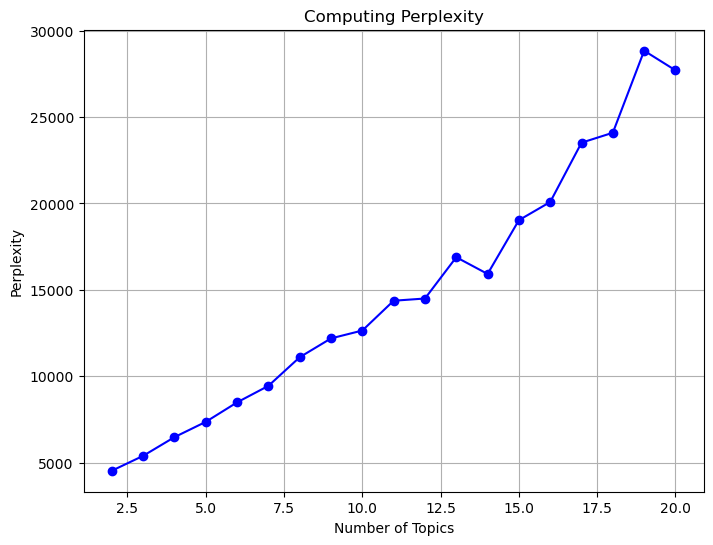

In [87]:
# 绘制困惑度随主题数量变化的折线图
plt.figure(figsize=(8, 6))
plt.plot(num_topics_range_china, perplexity_scores_china, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")
plt.title("Computing Perplexity")
plt.grid(True)
plt.show()

In [90]:
# 训练LDA模型
num_topics = 20  # 设置主题数量
lda_china = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', random_state=42)
lda_china.fit(Tfidf_china)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=20,
                          random_state=42)

In [91]:
# 打印每个主题的关键词
feature_names = Tfidf_vector_china.get_feature_names_out()
n_top_words = 20  # 每个主题的前N个关键词
for topic_idx, topic in enumerate(lda_china.components_):
    top_features_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_idx]
    print(f"china主题 {topic_idx + 1}:")
    print(", ".join(top_features))
    print()

china主题 1:
粉红色, 安静, 棺材, 万兽, 直线, 沉凝, 丁香, 醉人, 动向, 每一处, 闪开, 整齐, 翻身, 十二只, 问道, 幻象, 美感, 出局, 飞行速度, 交相

china主题 2:
日月, 蜗盾, 之王, 神蜗, 身长, 之头, 森林, 迟滞, 冲向, 汇聚, 蜥蜴, 魔龙, 彪悍, 神华, 岩浆, 四肢, 刺中, 书友, 银白色, 前肢

china主题 3:
唐门, 这番话, 反抗, 伤痕, 首府, 统治者, 丈夫, 里克, 局势, 行省, 走上, 伏击, 后续, 纵横交错, 正午, 随便, 繁衍生息, 时光, 寻找机会, 形象

china主题 4:
积分, 英俊, 长发, 创世神, 相貌, 女子, 眼眶, 温柔, 答案, 身材, 小看, 长裙, 撕开, 或者说, 头盔, 亲眼看到, 送到, 女性, 后撤, 唤醒

china主题 5:
王座, 之神印, 神印, 神器, 大军, 魔神, 剑意, 瓦沙克, 驱魔关, 军团, 杀戮, 封印, 七十二, 称号, 复活, 预言, 我会, 闭关, 龙星宇, 天印

china主题 6:
辉煌, 君主, 圣盾, 散开, 制造, 直到现在, 六千多, 踪迹, 稍微, 七天, 安洛先, 惨烈, 价值, 利益, 感谢, 教廷, 完整, 令其, 作品, 更大

china主题 7:
两天, 到达, 大得多, 执政, 公正, 内陆, 风光, 一刺, 南方, 百里, 驱魔城, 领导, 横档, 咬紧牙关, 繁华, 水火土, 延着, 仁爱, 谦卑, 诚实

china主题 8:
君王, 天堂, 僵尸, 奇美, 白玥, 四头, 憎恶, 泪水, 紧紧, 不愿, 洁白, 羽翼, 上前, 消亡, 升华, 背影, 抱住, 弧线, 禁制, 铁钩

china主题 9:
响起, 梦幻, 轰击, 破碎, 一瞬, 身体, 之光, 骷髅, 攻击, 风暴, 浓浓的, 说道, 冲击, 轰鸣, 双刀, 虚幻, 龙皓晨, 一声, 剧烈, 压迫

china主题 10:
一群, 声响, 扶手, 黑衣人, 帮不了, 芙洛, 系尔, 帝都, 适合, 惩戒, 几分, 淡淡的, 骑士, 中带, 羞涩, 冷峻, 偷偷, 一名, 开会, 少年

china主题 11:
男人, 统治, 自觉, 笑容, 身材高大, 山顶, 人手, 一片片, 发呆, 第